In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Chembl_library_1K.csv')
df.head()

,ID,Smiles,MolecularSpecies,MW,AlogP,Charge,H_Donors,H_Acceptors,Molecule
0,CHEMBL3425773,N#Cc1ccc(-c2coc3cc(O)ccc3c2=O)cc1,ACID,263.25,3.04,0,1,4,"<img data-content=""rdkit/molecule"" src=""data:i..."
1,CHEMBL1998753,COC(=O)[C@@H]1[C@H]2[C@H](OC(=O)c3ccccc3)CCN2O...,NEUTRAL,455.46,2.28,0,0,9,"<img data-content=""rdkit/molecule"" src=""data:i..."
2,CHEMBL1867860,COc1cccc(-n2c(=O)c3c(C)c(C)sc3n(CC(=O)Nc3ccccc...,NEUTRAL,465.53,3.49,0,1,8,"<img data-content=""rdkit/molecule"" src=""data:i..."
3,CHEMBL481686,Cc1cc(C)cc(N(Cc2ccc(CO)cc2)c2cc(C(=O)N3CCCC3)n...,NEUTRAL,417.55,4.71,0,1,4,"<img data-content=""rdkit/molecule"" src=""data:i..."
4,CHEMBL1939547,O=[N+]([O-])c1ccc(-c2nsc(-c3ccc([N+](=O)[O-])c...,NEUTRAL,328.31,3.69,0,0,7,"<img data-content=""rdkit/molecule"" src=""data:i..."


### Creat new column

In [ ]:
new_column = []
for i in df['MW']:
  if i > 500:
    new_column.append('large')
  else:
    new_column.append('small')

df['Type'] = new_column
df

In [ ]:
df['alaki'] = [0] * len(df)
df

### Change position of columns and rows

In [ ]:
new_column = []
for i in df['MW']:
  if i > 500:
    new_column.append('large')
  else:
    new_column.append('small')

df.insert(2, 'Type2', new_column)
df.head()

In [ ]:
df.insert(3, 'alaki2', [1]*len(df))
df.head()

In [ ]:
df2 = df[['ID', 'AlogP', 'Type2', 'MolecularSpecies', 'alaki2', 'MW', 'Charge', 'H_Donors', 'H_Acceptors', 'Molecule', 'Type', 'alaki', 'Smiles']]
df2

In [ ]:
df.reindex(columns=['ID', 'AlogP', 'Smiles', 'Type2', 'MolecularSpecies', 'alaki2', 'MW', 'Charge', 'H_Donors', 'H_Acceptors', 'Molecule', 'Type', 'alaki'], index= range(1, len(df)+1))

In [ ]:
df.sort_index(ascending=False)

### Filtering

In [ ]:
df.head()

In [ ]:
df.query('MW < 500 & 2<AlogP<3 & MolecularSpecies=="ACID"')

In [ ]:
df.query('MW < 500 | 2<AlogP<3 | MolecularSpecies=="ACID"')

In [ ]:
df.MW.mean()

In [ ]:
df.query('MW < MW.mean()')

In [ ]:
df.query('MW == MW.max()')

In [ ]:
df.where(df.MW > 500)

In [ ]:
df.mask(df.MW > 400)

In [ ]:
df.groupby('Type').get_group('large')

In [ ]:
df

In [ ]:
df.groupby('MolecularSpecies').sum()

In [ ]:
df.groupby('MolecularSpecies').MW.sum() # Use GroupBy() & compute sum on specific column.

In [ ]:
df.groupby(['Type', 'MolecularSpecies']).MW.sum() # Use GroupBy() & compute sum on specific column.

In [ ]:
df.MW.compare(df.AlogP)

In [ ]:
df.drop(['MW', 'alaki'], axis=1)

In [ ]:
df.drop([0, 1])

In [ ]:
df.drop(columns=['ID', 'Type'], index=[0, 1, 2, 3])

In [ ]:
! pip install rdkit-pypi==2022.3.3

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw, PandasTools

In [ ]:
df.head()

,ID,Smiles,MolecularSpecies,MW,AlogP,Charge,H_Donors,H_Acceptors,Molecule,ROMol
0,CHEMBL3425773,N#Cc1ccc(-c2coc3cc(O)ccc3c2=O)cc1,ACID,263.25,3.04,0,1,4,,
1,CHEMBL1998753,COC(=O)[C@@H]1[C@H]2[C@H](OC(=O)c3ccccc3)CCN2O...,NEUTRAL,455.46,2.28,0,0,9,,
2,CHEMBL1867860,COc1cccc(-n2c(=O)c3c(C)c(C)sc3n(CC(=O)Nc3ccccc...,NEUTRAL,465.53,3.49,0,1,8,,
3,CHEMBL481686,Cc1cc(C)cc(N(Cc2ccc(CO)cc2)c2cc(C(=O)N3CCCC3)n...,NEUTRAL,417.55,4.71,0,1,4,,
4,CHEMBL1939547,O=[N+]([O-])c1ccc(-c2nsc(-c3ccc([N+](=O)[O-])c...,NEUTRAL,328.31,3.69,0,0,7,,
...,...,...,...,...,...,...,...,...,...,...
995,CHEMBL3774681,Cn1nccc1CNc1ccc(O)c(C(=O)O)c1,ACID,247.25,1.44,0,3,5,,
996,CHEMBL3401344,CC(C)[C@]1(C)CC(=O)N(Cc2cc(F)cc(N3C[C@@H](c4cc...,NEUTRAL,436.53,4.02,0,2,3,,
997,CHEMBL4084475,Cc1ccc(CN2CCCN(C)C3(CCN(C)CC3)C2)cc1C,BASE,315.51,2.91,0,0,3,,
998,CHEMBL575164,COc1ccc(CCNC(=O)c2nn(-c3ccc(F)cc3F)c(-n3cccc3)...,NEUTRAL,470.91,4.88,0,1,5,,

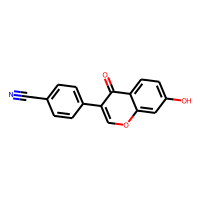
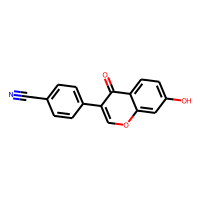
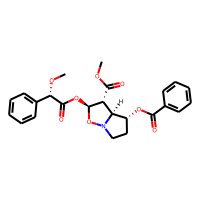
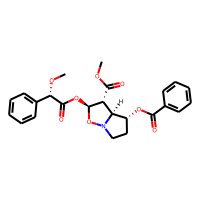
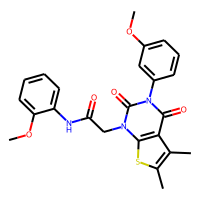
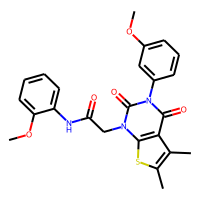
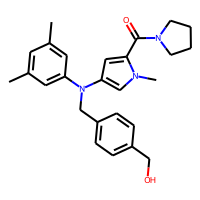
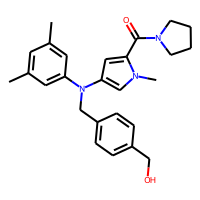
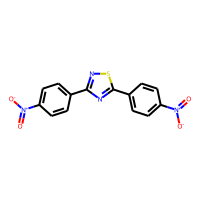
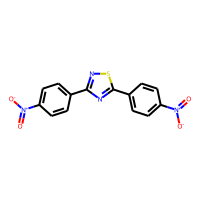
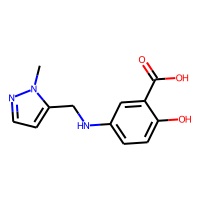
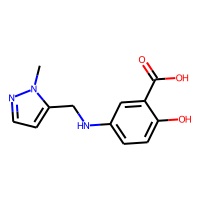
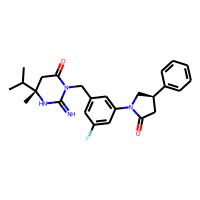
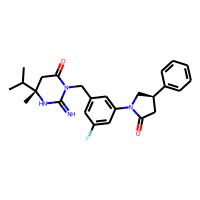
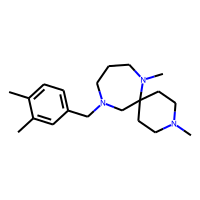
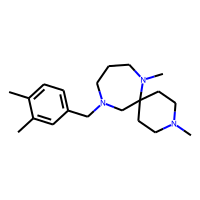
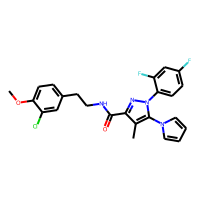
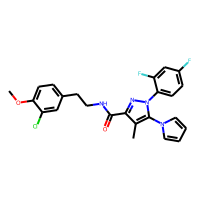
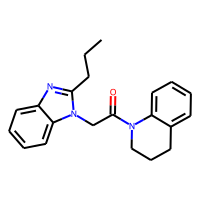
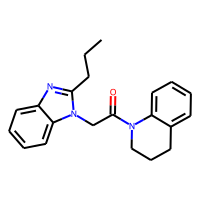

In [ ]:
PandasTools.AddMoleculeColumnToFrame(df)
df